[View in Colaboratory](https://colab.research.google.com/github/lkamat/FashionMnist/blob/master/CIFAR10.ipynb)

In [0]:
from __future__ import print_function

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Activation, Flatten
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the cifar10 data and pre-process the data

In [51]:
# Load the train and test data. There are 50,000 images in the train data set and 10,000 in the test dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print training set shape - note there are 50,000 training data of image size of 32 X 32 color images so 3 channels, 50,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')


x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)
50000 train set
10000 test set


#Visualize the data

[1]
4,Deer


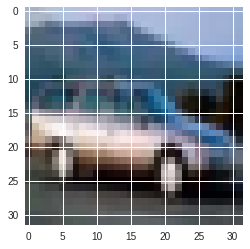

In [52]:
# Define the text labels
cifar10_labels = ["Airplane",  # index 0
                        "Automobile",      # index 1
                        "Bird",     # index 2 
                        "Cat",        # index 3 
                        "Deer",         # index 4
                        "Dog",       # index 5
                        "Frog",        # index 6 
                        "Horse",      # index 7 
                        "Ship",          # index 8 
                        "Truck"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 4
# y_train contains the lables, ranging from 0 to 9
label1_index = y_train[img_index]
print(label1_index)
# Print the label, for example 2 Pullover
print (str(img_index) + "," + cifar10_labels[img_index])
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

[3]


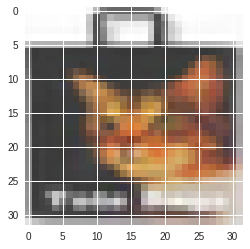

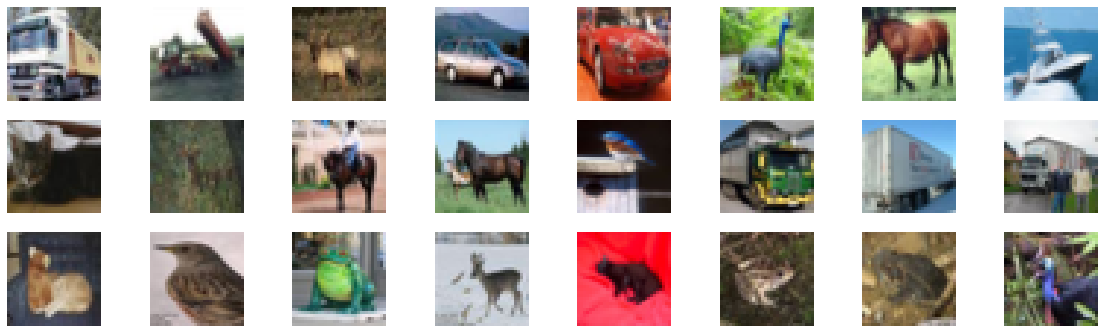

In [53]:
#print some sample data
print (y_train[3000])
fig= plt.figure()
plt.imshow(x_train[3000], cmap='gray')


fig= plt.figure(figsize=(20,10))
for i in range (1,25):
    ax1 = fig.add_subplot(5,8,i)
    plt.xticks([], [])
    plt.yticks([], [])
    ax1.imshow(x_train[i], cmap='gray')

#Validation data, data normalization

In [54]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)

img_rows, img_cols = 32, 32
num_classes = 10

#x_train = x_train.reshape(x_train.shape[1], img_rows, img_cols, 1)
#x_valid = x_valid.reshape(x_valid.shape[1], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[1], img_rows, img_cols, 1)

#input_shape = (img_rows, img_cols, 1)
input_shape = x_train.shape[1:]

x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'valid samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (45000, 32, 32, 3)
45000 train samples
5000 valid samples
10000 test samples


# Model architecture
## Conv2d, Activation, Max Pooling2d, Dropout -- 3 times
## Flatten, Dense, Activation, Dropout, Dense, Activation

In [0]:
#Model Building

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


#Compile the model
## Loss, optimizer, metrics

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Train the model

In [0]:
# Add the modelcheckpoint to save the best weights used during validation data
checkpointer = ModelCheckpoint(filepath='modelcifar.weights.best.hdf5', verbose = 1, save_best_only=True)

In [58]:
## train the model with batch_size of 128, epochs of 20
model.fit(x_train, y_train,
          batch_size=128,
          epochs=50,
          validation_split=0.2,
          shuffle=True,callbacks=[checkpointer] )

Train on 36000 samples, validate on 9000 samples
Epoch 1/50
36000/36000 [==============================] - 8s 220us/step - loss: 1.9082 - acc: 0.2962 - val_loss: 1.5882 - val_acc: 0.4361

Epoch 00001: val_loss improved from inf to 1.58822, saving model to modelcifar.weights.best.hdf5
Epoch 2/50
36000/36000 [==============================] - 7s 207us/step - loss: 1.5506 - acc: 0.4346 - val_loss: 1.3494 - val_acc: 0.5178

Epoch 00002: val_loss improved from 1.58822 to 1.34939, saving model to modelcifar.weights.best.hdf5
Epoch 3/50
20864/36000 [================>.............] - ETA: 2s - loss: 1.4264 - acc: 0.4843

36000/36000 [==============================] - 8s 208us/step - loss: 1.3964 - acc: 0.4950 - val_loss: 1.2054 - val_acc: 0.5729

Epoch 00003: val_loss improved from 1.34939 to 1.20539, saving model to modelcifar.weights.best.hdf5
Epoch 4/50
36000/36000 [==============================] - 7s 207us/step - loss: 1.2851 - acc: 0.5381 - val_loss: 1.1289 - val_acc: 0.6030

Epoch 00004: val_loss improved from 1.20539 to 1.12894, saving model to modelcifar.weights.best.hdf5
Epoch 5/50
33536/36000 [==========================>...] - ETA: 0s - loss: 1.2109 - acc: 0.5663

36000/36000 [==============================] - 7s 207us/step - loss: 1.2087 - acc: 0.5669 - val_loss: 1.0296 - val_acc: 0.6432

Epoch 00005: val_loss improved from 1.12894 to 1.02955, saving model to modelcifar.weights.best.hdf5
Epoch 6/50
36000/36000 [==============================] - 7s 207us/step - loss: 1.1510 - acc: 0.5903 - val_loss: 0.9840 - val_acc: 0.6649

Epoch 00006: val_loss improved from 1.02955 to 0.98405, saving model to modelcifar.weights.best.hdf5
Epoch 7/50
35200/36000 [============================>.] - ETA: 0s - loss: 1.0956 - acc: 0.6099

36000/36000 [==============================] - 7s 208us/step - loss: 1.0940 - acc: 0.6110 - val_loss: 0.9414 - val_acc: 0.6758

Epoch 00007: val_loss improved from 0.98405 to 0.94135, saving model to modelcifar.weights.best.hdf5
Epoch 8/50
36000/36000 [==============================] - 8s 209us/step - loss: 1.0567 - acc: 0.6270 - val_loss: 0.9413 - val_acc: 0.6770

Epoch 00008: val_loss improved from 0.94135 to 0.94133, saving model to modelcifar.weights.best.hdf5
Epoch 9/50
34944/36000 [============================>.] - ETA: 0s - loss: 1.0197 - acc: 0.6412

36000/36000 [==============================] - 7s 208us/step - loss: 1.0193 - acc: 0.6416 - val_loss: 0.8699 - val_acc: 0.6982

Epoch 00009: val_loss improved from 0.94133 to 0.86986, saving model to modelcifar.weights.best.hdf5
Epoch 10/50
36000/36000 [==============================] - 7s 207us/step - loss: 0.9868 - acc: 0.6502 - val_loss: 0.8333 - val_acc: 0.7102

Epoch 00010: val_loss improved from 0.86986 to 0.83330, saving model to modelcifar.weights.best.hdf5
Epoch 11/50
35328/36000 [============================>.] - ETA: 0s - loss: 0.9647 - acc: 0.6627

36000/36000 [==============================] - 7s 208us/step - loss: 0.9649 - acc: 0.6625 - val_loss: 0.8184 - val_acc: 0.7153

Epoch 00011: val_loss improved from 0.83330 to 0.81841, saving model to modelcifar.weights.best.hdf5
Epoch 12/50
36000/36000 [==============================] - 7s 208us/step - loss: 0.9429 - acc: 0.6682 - val_loss: 0.7995 - val_acc: 0.7272

Epoch 00012: val_loss improved from 0.81841 to 0.79948, saving model to modelcifar.weights.best.hdf5
Epoch 13/50
34816/36000 [============================>.] - ETA: 0s - loss: 0.9152 - acc: 0.6814

36000/36000 [==============================] - 7s 207us/step - loss: 0.9166 - acc: 0.6807 - val_loss: 0.7608 - val_acc: 0.7396

Epoch 00013: val_loss improved from 0.79948 to 0.76081, saving model to modelcifar.weights.best.hdf5
Epoch 14/50
36000/36000 [==============================] - 7s 207us/step - loss: 0.8931 - acc: 0.6843 - val_loss: 0.7475 - val_acc: 0.7381

Epoch 00014: val_loss improved from 0.76081 to 0.74752, saving model to modelcifar.weights.best.hdf5
Epoch 15/50
35584/36000 [============================>.] - ETA: 0s - loss: 0.8809 - acc: 0.6912

36000/36000 [==============================] - 7s 207us/step - loss: 0.8811 - acc: 0.6908 - val_loss: 0.7427 - val_acc: 0.7432

Epoch 00015: val_loss improved from 0.74752 to 0.74268, saving model to modelcifar.weights.best.hdf5
Epoch 16/50
36000/36000 [==============================] - 7s 208us/step - loss: 0.8674 - acc: 0.6963 - val_loss: 0.7491 - val_acc: 0.7402

Epoch 00016: val_loss did not improve from 0.74268
Epoch 17/50
36000/36000 [==============================] - 8s 209us/step - loss: 0.8560 - acc: 0.7017 - val_loss: 0.7345 - val_acc: 0.7463

Epoch 00017: val_loss improved from 0.74268 to 0.73450, saving model to modelcifar.weights.best.hdf5
Epoch 18/50
 1152/36000 [..............................] - ETA: 6s - loss: 0.8285 - acc: 0.7057

36000/36000 [==============================] - 8s 211us/step - loss: 0.8351 - acc: 0.7073 - val_loss: 0.7609 - val_acc: 0.7388

Epoch 00018: val_loss did not improve from 0.73450
Epoch 19/50
36000/36000 [==============================] - 7s 206us/step - loss: 0.8232 - acc: 0.7086 - val_loss: 0.7198 - val_acc: 0.7479

Epoch 00019: val_loss improved from 0.73450 to 0.71977, saving model to modelcifar.weights.best.hdf5
Epoch 20/50
36000/36000 [==============================] - 7s 208us/step - loss: 0.8170 - acc: 0.7126 - val_loss: 0.7778 - val_acc: 0.7286

Epoch 00020: val_loss did not improve from 0.71977
Epoch 21/50
  512/36000 [..............................] - ETA: 6s - loss: 0.8484 - acc: 0.7363

36000/36000 [==============================] - 7s 207us/step - loss: 0.8099 - acc: 0.7150 - val_loss: 0.7119 - val_acc: 0.7531

Epoch 00021: val_loss improved from 0.71977 to 0.71189, saving model to modelcifar.weights.best.hdf5
Epoch 22/50
36000/36000 [==============================] - 7s 207us/step - loss: 0.7959 - acc: 0.7189 - val_loss: 0.7605 - val_acc: 0.7362

Epoch 00022: val_loss did not improve from 0.71189
Epoch 23/50
32256/36000 [=========================>....] - ETA: 0s - loss: 0.7929 - acc: 0.7206

36000/36000 [==============================] - 8s 210us/step - loss: 0.7938 - acc: 0.7201 - val_loss: 0.7142 - val_acc: 0.7517

Epoch 00023: val_loss did not improve from 0.71189
Epoch 24/50
36000/36000 [==============================] - 7s 208us/step - loss: 0.7746 - acc: 0.7288 - val_loss: 0.6882 - val_acc: 0.7619

Epoch 00024: val_loss improved from 0.71189 to 0.68816, saving model to modelcifar.weights.best.hdf5
Epoch 25/50
36000/36000 [==============================] - 8s 210us/step - loss: 0.7768 - acc: 0.7249 - val_loss: 0.6895 - val_acc: 0.7577

Epoch 00025: val_loss did not improve from 0.68816
Epoch 26/50
 2048/36000 [>.............................] - ETA: 6s - loss: 0.7499 - acc: 0.7280

36000/36000 [==============================] - 8s 208us/step - loss: 0.7667 - acc: 0.7281 - val_loss: 0.7187 - val_acc: 0.7474

Epoch 00026: val_loss did not improve from 0.68816
Epoch 27/50
36000/36000 [==============================] - 8s 209us/step - loss: 0.7651 - acc: 0.7297 - val_loss: 0.6943 - val_acc: 0.7577

Epoch 00027: val_loss did not improve from 0.68816
Epoch 28/50
36000/36000 [==============================] - 8s 209us/step - loss: 0.7554 - acc: 0.7343 - val_loss: 0.7209 - val_acc: 0.7494

Epoch 00028: val_loss did not improve from 0.68816
Epoch 29/50
 2048/36000 [>.............................] - ETA: 6s - loss: 0.7736 - acc: 0.7266

36000/36000 [==============================] - 7s 207us/step - loss: 0.7402 - acc: 0.7383 - val_loss: 0.6609 - val_acc: 0.7702

Epoch 00029: val_loss improved from 0.68816 to 0.66087, saving model to modelcifar.weights.best.hdf5
Epoch 30/50
36000/36000 [==============================] - 7s 208us/step - loss: 0.7383 - acc: 0.7413 - val_loss: 0.6532 - val_acc: 0.7728

Epoch 00030: val_loss improved from 0.66087 to 0.65317, saving model to modelcifar.weights.best.hdf5
Epoch 31/50
31104/36000 [========================>.....] - ETA: 0s - loss: 0.7388 - acc: 0.7395

36000/36000 [==============================] - 7s 208us/step - loss: 0.7374 - acc: 0.7400 - val_loss: 0.6607 - val_acc: 0.7684

Epoch 00031: val_loss did not improve from 0.65317
Epoch 32/50
36000/36000 [==============================] - 7s 208us/step - loss: 0.7291 - acc: 0.7431 - val_loss: 0.6840 - val_acc: 0.7613

Epoch 00032: val_loss did not improve from 0.65317
Epoch 33/50
36000/36000 [==============================] - 7s 207us/step - loss: 0.7245 - acc: 0.7448 - val_loss: 0.6598 - val_acc: 0.7722

Epoch 00033: val_loss did not improve from 0.65317
Epoch 34/50
 7680/36000 [=====>........................] - ETA: 5s - loss: 0.7075 - acc: 0.7540

36000/36000 [==============================] - 7s 208us/step - loss: 0.7196 - acc: 0.7449 - val_loss: 0.6467 - val_acc: 0.7766

Epoch 00034: val_loss improved from 0.65317 to 0.64672, saving model to modelcifar.weights.best.hdf5
Epoch 35/50
36000/36000 [==============================] - 7s 208us/step - loss: 0.7096 - acc: 0.7473 - val_loss: 0.6523 - val_acc: 0.7721

Epoch 00035: val_loss did not improve from 0.64672
Epoch 36/50
35328/36000 [============================>.] - ETA: 0s - loss: 0.7056 - acc: 0.7511

36000/36000 [==============================] - 7s 208us/step - loss: 0.7056 - acc: 0.7511 - val_loss: 0.7036 - val_acc: 0.7520

Epoch 00036: val_loss did not improve from 0.64672
Epoch 37/50
36000/36000 [==============================] - 8s 209us/step - loss: 0.6980 - acc: 0.7495 - val_loss: 0.6421 - val_acc: 0.7767

Epoch 00037: val_loss improved from 0.64672 to 0.64213, saving model to modelcifar.weights.best.hdf5
Epoch 38/50
36000/36000 [==============================] - 8s 210us/step - loss: 0.6948 - acc: 0.7547 - val_loss: 0.6871 - val_acc: 0.7612

Epoch 00038: val_loss did not improve from 0.64213
Epoch 39/50
 3584/36000 [=>............................] - ETA: 6s - loss: 0.6994 - acc: 0.7486

36000/36000 [==============================] - 7s 207us/step - loss: 0.6896 - acc: 0.7549 - val_loss: 0.6590 - val_acc: 0.7738

Epoch 00039: val_loss did not improve from 0.64213
Epoch 40/50
36000/36000 [==============================] - 7s 208us/step - loss: 0.6870 - acc: 0.7581 - val_loss: 0.6587 - val_acc: 0.7726

Epoch 00040: val_loss did not improve from 0.64213
Epoch 41/50
36000/36000 [==============================] - 8s 210us/step - loss: 0.6829 - acc: 0.7585 - val_loss: 0.6371 - val_acc: 0.7829

Epoch 00041: val_loss improved from 0.64213 to 0.63715, saving model to modelcifar.weights.best.hdf5
Epoch 42/50
 2432/36000 [=>............................] - ETA: 6s - loss: 0.6600 - acc: 0.7669

36000/36000 [==============================] - 8s 210us/step - loss: 0.6812 - acc: 0.7580 - val_loss: 0.6473 - val_acc: 0.7757

Epoch 00042: val_loss did not improve from 0.63715
Epoch 43/50
36000/36000 [==============================] - 8s 211us/step - loss: 0.6857 - acc: 0.7577 - val_loss: 0.6491 - val_acc: 0.7756

Epoch 00043: val_loss did not improve from 0.63715
Epoch 44/50
36000/36000 [==============================] - 7s 208us/step - loss: 0.6746 - acc: 0.7619 - val_loss: 0.6358 - val_acc: 0.7799

Epoch 00044: val_loss improved from 0.63715 to 0.63582, saving model to modelcifar.weights.best.hdf5
Epoch 45/50
 2176/36000 [>.............................] - ETA: 6s - loss: 0.6621 - acc: 0.7693

36000/36000 [==============================] - 7s 208us/step - loss: 0.6685 - acc: 0.7634 - val_loss: 0.6410 - val_acc: 0.7759

Epoch 00045: val_loss did not improve from 0.63582
Epoch 46/50
36000/36000 [==============================] - 7s 208us/step - loss: 0.6739 - acc: 0.7611 - val_loss: 0.6443 - val_acc: 0.7753

Epoch 00046: val_loss did not improve from 0.63582
Epoch 47/50
36000/36000 [==============================] - 7s 208us/step - loss: 0.6640 - acc: 0.7666 - val_loss: 0.6343 - val_acc: 0.7797

Epoch 00047: val_loss improved from 0.63582 to 0.63432, saving model to modelcifar.weights.best.hdf5
Epoch 48/50
 1792/36000 [>.............................] - ETA: 6s - loss: 0.6544 - acc: 0.7612

36000/36000 [==============================] - 7s 207us/step - loss: 0.6552 - acc: 0.7659 - val_loss: 0.6480 - val_acc: 0.7741

Epoch 00048: val_loss did not improve from 0.63432
Epoch 49/50
36000/36000 [==============================] - 8s 209us/step - loss: 0.6645 - acc: 0.7634 - val_loss: 0.6369 - val_acc: 0.7790

Epoch 00049: val_loss did not improve from 0.63432
Epoch 50/50
36000/36000 [==============================] - 8s 209us/step - loss: 0.6593 - acc: 0.7670 - val_loss: 0.6689 - val_acc: 0.7723

Epoch 00050: val_loss did not improve from 0.63432


#Load model with best validation accuracy

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('modelcifar.weights.best.hdf5')

#Test accuracy

In [60]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)



# Print test loss
print('Test loss:', score[0])

# Print test accuracy
print('\n', 'Test accuracy:', score)

Test loss: 0.6577361293792725

 Test accuracy: [0.6577361293792725, 0.7768]


#Visualize prediction

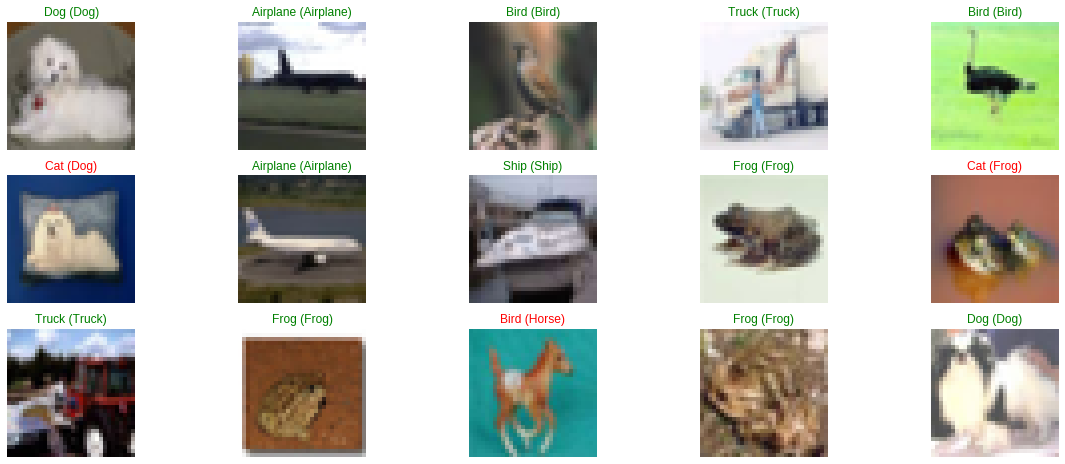

In [61]:
y_hat = model.predict(x_test)
import numpy as np

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(cifar10_labels[predict_index], 
                                  cifar10_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))